<a href="https://colab.research.google.com/github/YaswanthPothineni/Real_State_EDA/blob/main/real_state_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [3]:
df = pd.read_csv('/content/world_real_estate_data(147k).csv')

In [4]:
df.head(5)

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,Turkey,"Mediterranean Region, Turkey",NaN,5.0,1.0,3.0,2.0,2.0,120 m²,110 m²,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021.0,2.0,NaN,NaN,NaN,NaN,500 m²,480 m²,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",NaN,5.0,2.0,2.0,1.0,1.0,65 m²,60 m²,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
3,"1 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,40 m²,99900.0,https://realting.com/uploads/bigSlider/e9a/e06...,https://realting.com/property-for-sale/thailan...
4,"2 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,36 m²,67000.0,https://realting.com/uploads/bigSlider/453/aa2...,https://realting.com/property-for-sale/thailan...


In [5]:
def get_house_type(x):
    realstate_type = ['penthouse', 'apartment' , 'studio apartment','castle','chalet','house','duplex','cottage ','bungalow','mansion', 'condo','villa','room' ]
    for type in realstate_type:
        result = re.findall(type , x.lower())
        if result != []:
            return str(result[0].title())
        if result == [] and type == realstate_type[-1]:
            return 'Unknown'
house_type = df['title'].apply(lambda x: get_house_type(x))
df.insert(2 , 'house_type' , house_type)

In [6]:
#Drop unwanted columns
df = df.drop(['location','image','url'] , axis = 1)

In [7]:
#Remove "m2" from columns
df['apartment_total_area'] = df['apartment_total_area'].apply(lambda x : int(x.split(' ')[0]) if pd.notnull(x) else np.NaN)
df['apartment_living_area'] = df['apartment_living_area'].apply(lambda x : int(x.split(' ')[0]) if pd.notnull(x) else np.NaN)

In [8]:
df['country'] = df['country'].fillna('Unknown')
df = df.dropna()
df = df.astype(int , errors= 'ignore')

In [9]:
df.describe()

,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.00000,1767.000000,1.767000e+03
mean,2017.024901,11.491228,6.094510,2.712507,1.889643,1.492360,98.45614,80.159593,2.550281e+05
std,68.897724,10.655142,7.185269,1.121688,0.954064,0.716117,59.17503,49.176485,3.306338e+05
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.00000,7.000000,1.390000e+04
25%,2021.000000,4.000000,1.000000,2.000000,1.000000,1.000000,58.00000,47.000000,8.883700e+04
50%,2023.000000,8.000000,3.000000,3.000000,2.000000,1.000000,83.00000,67.000000,1.673870e+05
75%,2024.000000,15.000000,8.000000,3.000000,2.000000,2.000000,125.00000,100.500000,3.021660e+05
max,2027.000000,65.000000,51.000000,10.000000,10.000000,10.000000,682.00000,526.000000,5.277036e+06


In [10]:
#Remove unwanted years ( choosed between 2000 -> 2023)
df = df[df['building_construction_year'].between(2000 , 2023)]

In [11]:
df.duplicated().sum()

9

In [12]:
df = df.drop_duplicates(keep = 'first')

In [13]:
df.shape

(1133, 12)

In [14]:
df.head(5)

,title,country,house_type,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD
6,"4 room apartment 245 m² in Yesiloez, Turkey",Turkey,Apartment,2007,2,3,5,4,4,245,245,274415
15,"2 room apartment 54 m² in Prague, Czech Republic",Czech Republic,Apartment,2023,4,2,4,2,1,54,54,314990
146,"2 room apartment 93 m² in Alanya, Turkey",Turkey,Apartment,2020,4,4,3,2,1,93,75,248071
229,Multilevel apartments 3 bedrooms 220 m² in Kar...,Turkey,Apartment,2013,4,4,1,3,3,220,216,338143
280,"Penthouse 4 bedrooms 210 m² in Antalya, Turkey",Turkey,Penthouse,2019,7,7,5,4,2,210,195,368469


<Axes: xlabel='building_construction_year', ylabel='size'>

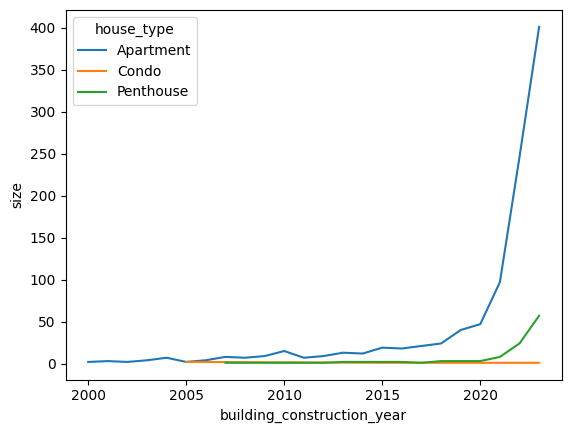

In [15]:
year_n_house = (
    df.groupby(['building_construction_year','house_type'] , as_index = False)
    .size()
)

sns.lineplot(
    data = year_n_house
    ,x = 'building_construction_year'
    ,y = 'size'
    ,hue = 'house_type'
)

<Axes: xlabel='building_construction_year', ylabel='price_in_USD'>

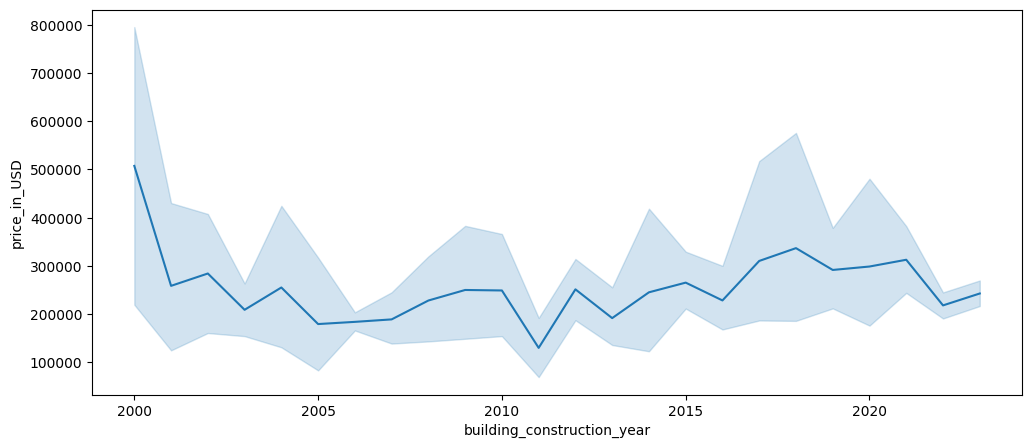

In [16]:
plt.figure(figsize = (12,5))

sns.lineplot(
    data = df
    ,x = 'building_construction_year'
    ,y = 'price_in_USD'
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Turkey'),
  Text(1, 0, 'Czech Republic'),
  Text(2, 0, 'Montenegro'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Uzbekistan'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Greece'),
  Text(7, 0, 'Hungary'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'Belarus'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Latvia'),
  Text(12, 0, 'Croatia'),
  Text(13, 0, 'Georgia'),
  Text(14, 0, 'Poland'),
  Text(15, 0, 'UAE'),
  Text(16, 0, 'Thailand'),
  Text(17, 0, 'Portugal'),
  Text(18, 0, 'Northern Cyprus'),
  Text(19, 0, 'Cyprus'),
  Text(20, 0, 'Indonesia')])

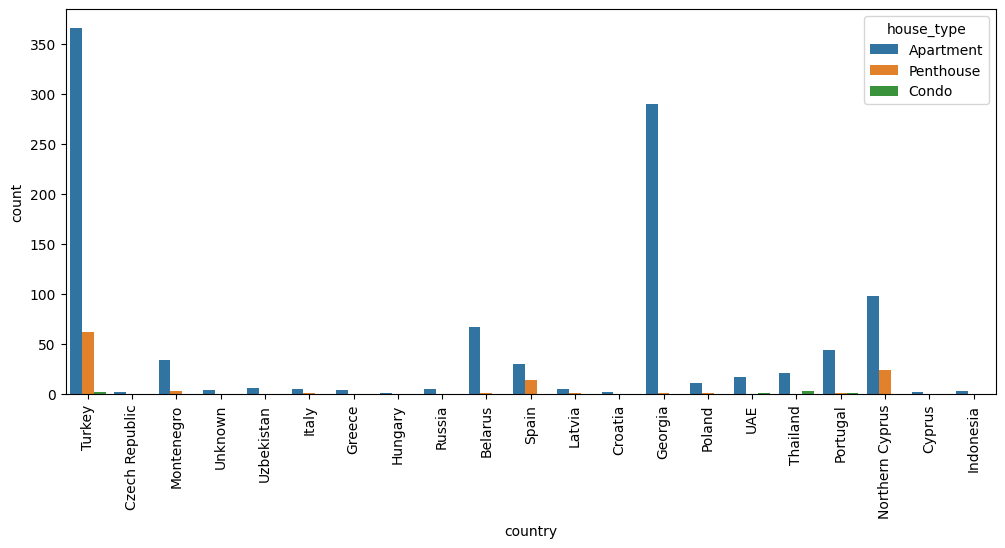

In [17]:
fig = plt.figure(figsize = (12,5))
sns.countplot(
    data = df
    ,x = 'country'
    ,hue = 'house_type'
)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Turkey'),
  Text(1, 0, 'Czech Republic'),
  Text(2, 0, 'Montenegro'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Uzbekistan'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Greece'),
  Text(7, 0, 'Hungary'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'Belarus'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Latvia'),
  Text(12, 0, 'Croatia'),
  Text(13, 0, 'Georgia'),
  Text(14, 0, 'Poland'),
  Text(15, 0, 'UAE'),
  Text(16, 0, 'Thailand'),
  Text(17, 0, 'Portugal'),
  Text(18, 0, 'Northern Cyprus'),
  Text(19, 0, 'Cyprus'),
  Text(20, 0, 'Indonesia')])

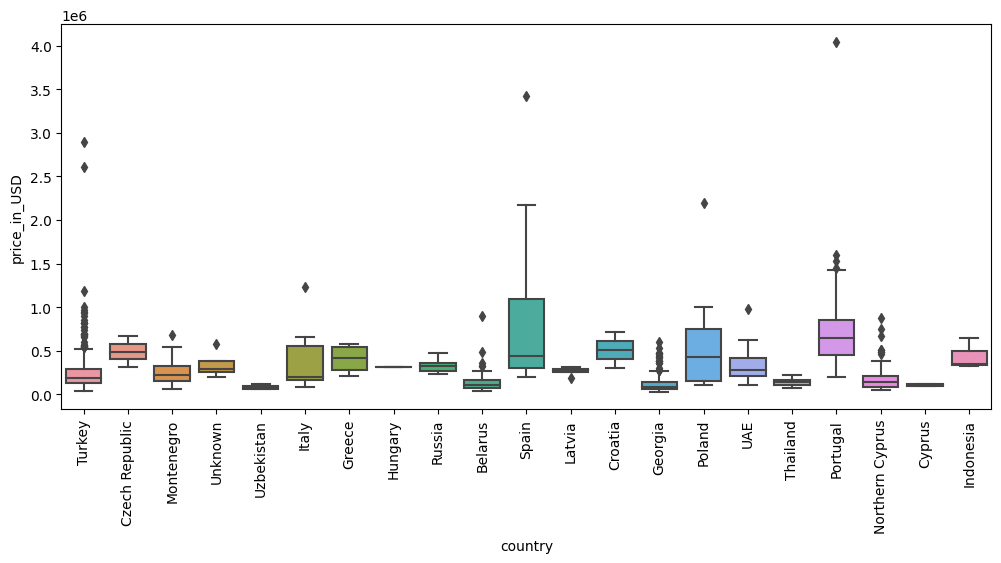

In [18]:
fig = plt.figure(figsize = (12,5))
fig = sns.boxplot(
    data = df
    , x = 'country'
    ,y = 'price_in_USD'
)
plt.xticks(rotation = 90
)

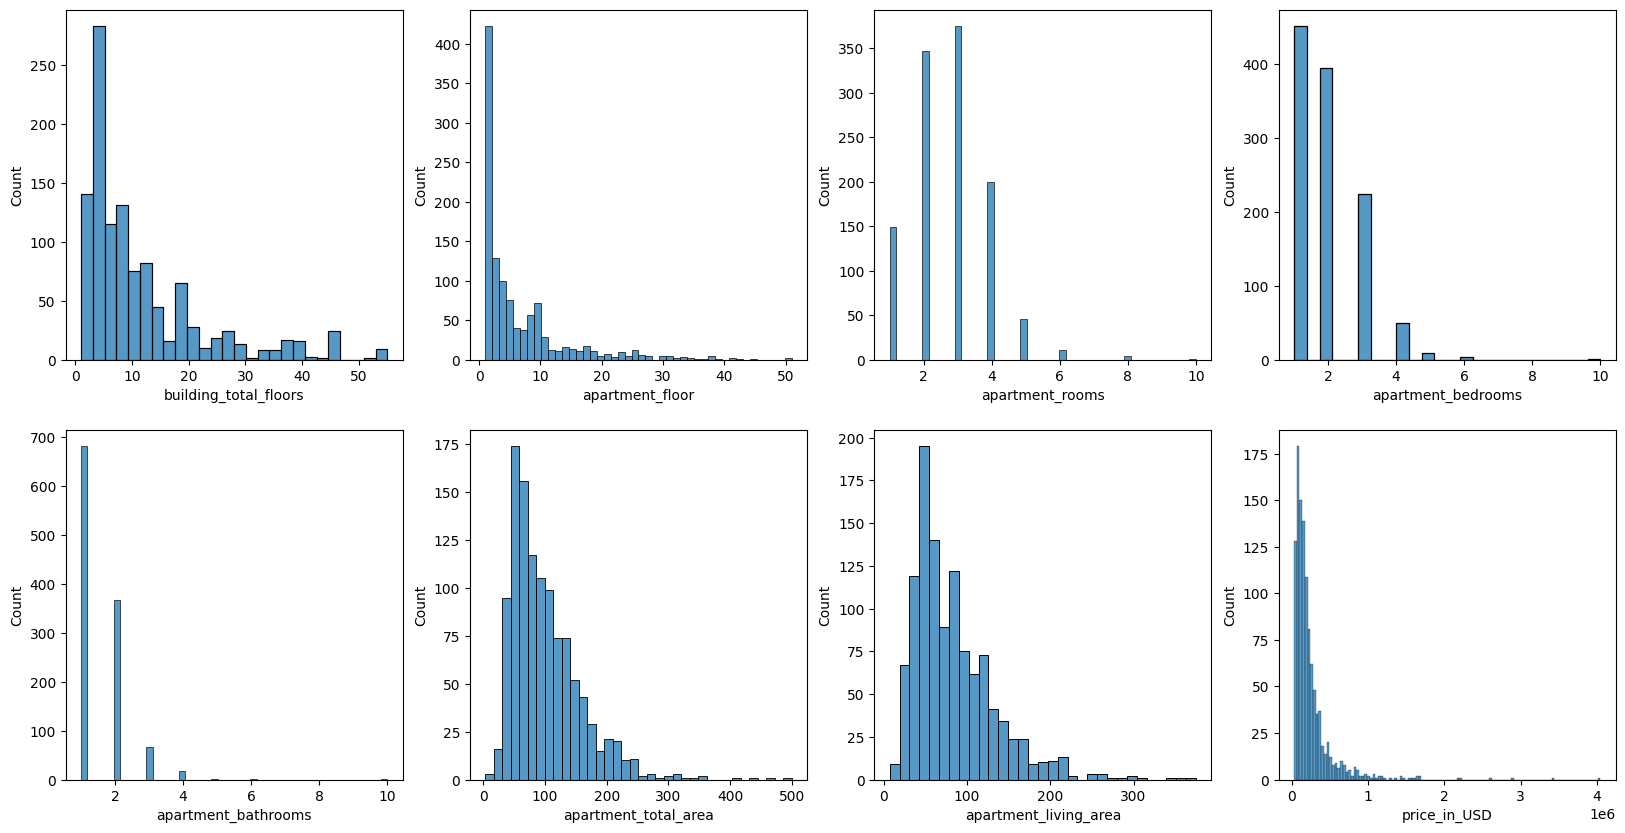

In [19]:
col_list = ["building_total_floors","apartment_floor","apartment_rooms","apartment_bedrooms","apartment_bathrooms","apartment_total_area","apartment_living_area","price_in_USD"]

fig , ax = plt.subplots(2 , 4 , figsize = (20,10) )


row_n , col_n = 0 , 0
for col in col_list:
    sns.histplot(
        data = df
        ,x = col
        ,ax = ax[row_n , col_n]
    )

    if col_n ==  3:
        row_n += 1
        col_n = 0
    else:
        col_n += 1

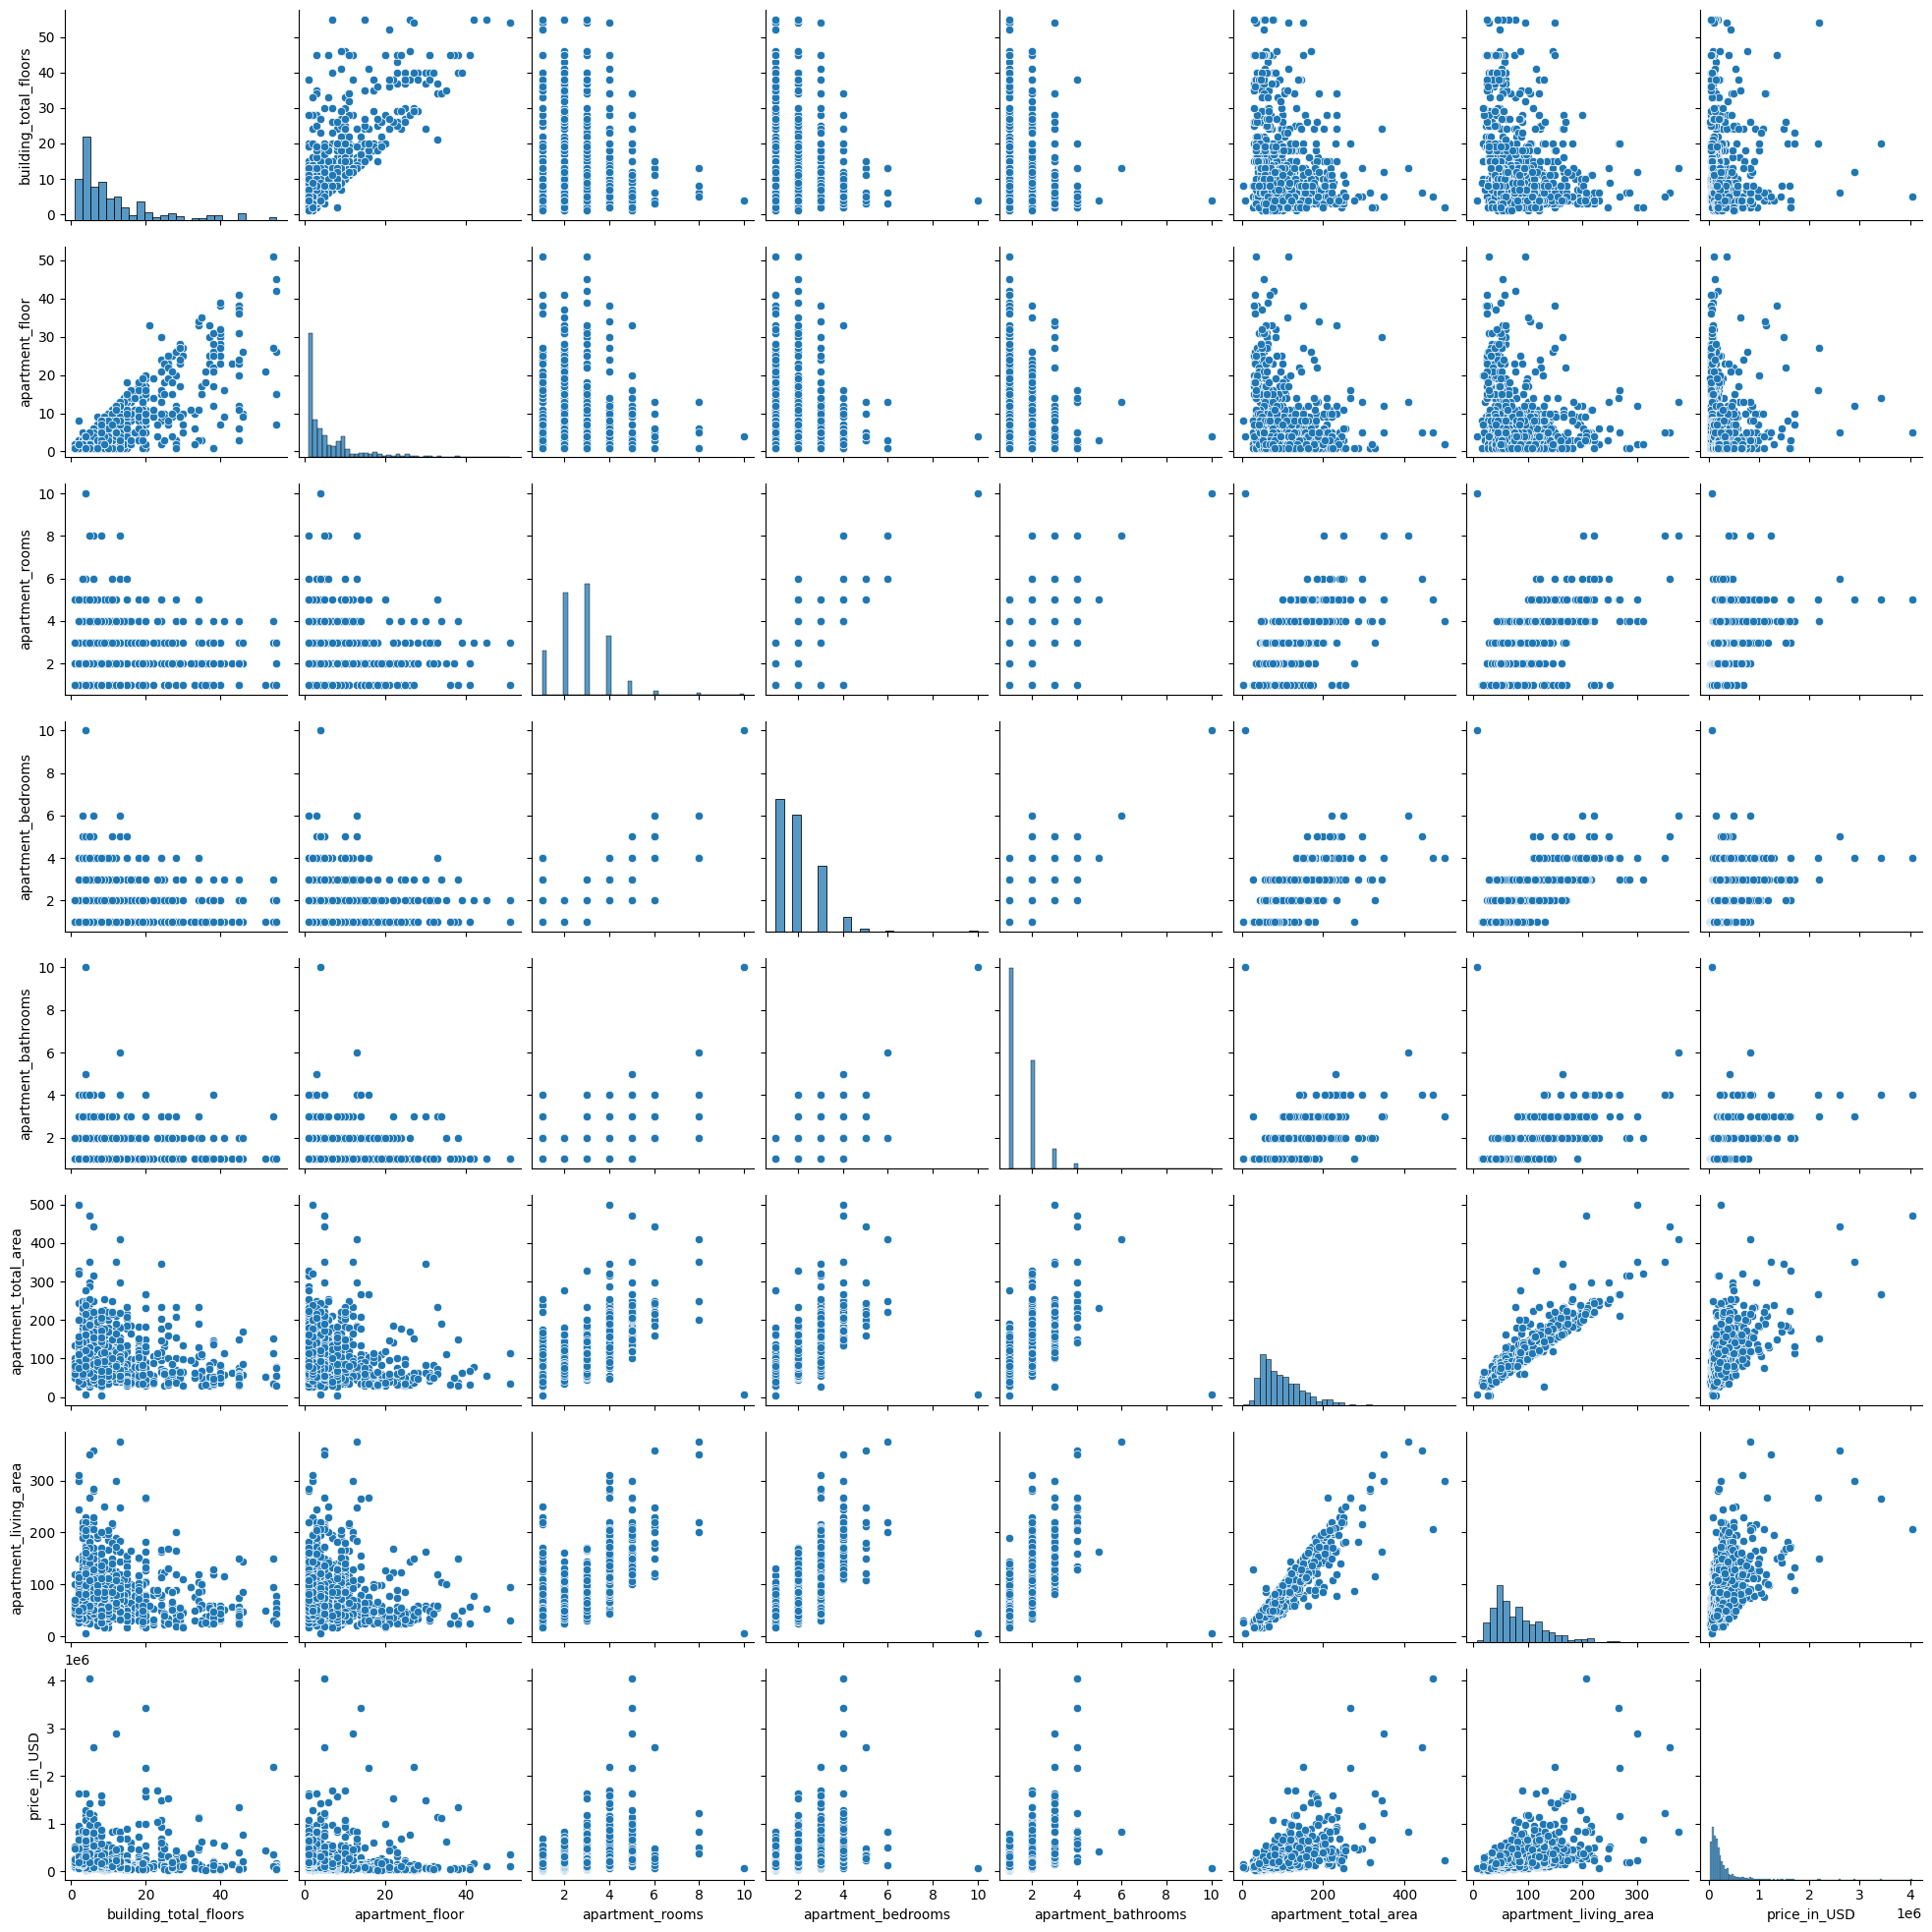

In [20]:
sns.pairplot(
    data = df.filter(col_list)
)